<a href="https://colab.research.google.com/github/AkshayKohad/ML-Tutorial/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("SMSSpamCollection.txt",sep="\t",names=['label','text'])

In [5]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
for i in range(10):
  print(df.iloc[i,-1])
  print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

In [8]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
sn = SnowballStemmer("english")
stop = set(stopwords.words('english'))

In [10]:
def clean_text(sms):
  sms = sms.lower()
  sms = re.sub('[^a-z0-9]',' ',sms)
  sms = nltk.word_tokenize(sms)
  sms = [t for t in sms if len(t)>1]
  sms = [sn.stem(word) for word in sms if word not in stop]
  sms = ' '.join(sms)
  return sms

In [11]:
clean_text("Get is... are... playing they UNLIMITED <!!!!>???? Free data play 100GB.... at Rs.0")

'get play unlimit free data play 100gb rs'

In [12]:
df['clean_text'] = df['text'].apply(clean_text)

In [13]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [14]:
from wordcloud import WordCloud

In [17]:
hamdata = df[df['label']=='ham']
hamdata = hamdata['clean_text']

In [18]:
hamdata

0       go jurong point crazi avail bugi great world l...
1                                     ok lar joke wif oni
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                  go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean_text, Length: 4825, dtype: object

In [19]:
def wordCloud(data):
  words = ' '.join(data)
  wc = WordCloud()
  wc = wc.generate(words)

  plt.imshow(wc)



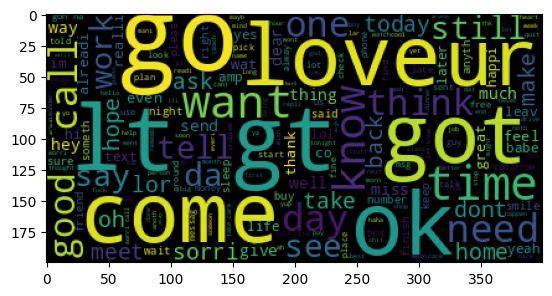

In [20]:
wordCloud(hamdata)

In [22]:
spamdata = df[df['label']=='spam']
spamdata = spamdata['clean_text']

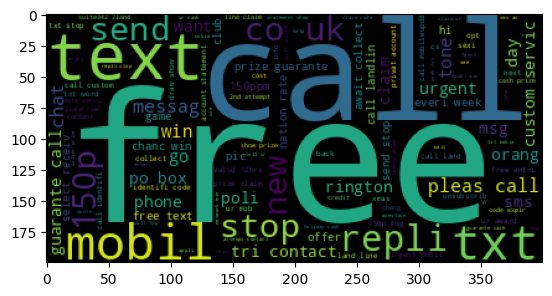

In [23]:
wordCloud(spamdata)

#### Featurization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer(max_features=5000)

In [30]:
X = cv.fit_transform(df['clean_text'])

In [31]:
X.shape

(5572, 5000)

In [33]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [34]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

#### Model Building

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
model = MultinomialNB()

In [41]:
model.fit(X_train,y_train)

MultinomialNB()

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_test,y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [44]:
pd.DataFrame({'Actual':y_test,'Predicted':y_test})

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1834,0,0
1835,0,0
1836,0,0
1837,0,0


#### Evaluation

In [45]:
print("Accuracy on Training Data : ")
print(model.score(X_train,y_train))

Accuracy on Training data : 


0.99196356817573

In [46]:
print("Accuracy on Test Data : ")
print(model.score(X_test,y_test))

Accuracy on Test Data : 
0.989668297988037


In [47]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [48]:
confusion_matrix(y_test,y_pred)

array([[1588,    9],
       [  10,  232]])

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1597
           1       0.96      0.96      0.96       242

    accuracy                           0.99      1839
   macro avg       0.98      0.98      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [50]:
f1_score(y_test,y_pred)

0.9606625258799172